# MUT Scraper
### A short tutorial for the MUTScraper module
#### Matt Johnson. April 27, 2019

-------------

Available Position Options:
- WR
- RB
- QB
- FB
- TE
- OL (LT, LG, C, RG, RT)
- DB (SS, FS, CB)
- LB (ROLB, MLB, LOLB)
- DL (RE, DT, LE)
- ST (K, P)

In [1]:
# Import Libraries
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.plotly as py
import plotly.graph_objs as go
from ipywidgets import interactive, HBox, VBox, widgets, interact
from MUTScraper import Player, PlayerHandler

#### Input position, minimum overall, and date:
Click the link and get the number of pages (TODO: this is not great, fix).

Here we have chosen to look at Defensive Line (DL) players:

In [2]:
ph = PlayerHandler(position='WR', min_ovr=95, date='apr27')

Retrieve the number of pages...
https://www.muthead.com/19/players?filter-market=3&filter-ovr-min=95&filter-position=8&page=1


#### Start Scraping
Calling handle_players(pages=numberOfPages) starts the scraping process:

In [3]:
ph.handle_players(pages=3)

 75 player links gathered.


#### Data
We now have the defensive attributes and traits for the players.<br>
Here is the DataFrame holding the player data:

In [4]:
pdf = ph.player_df
pdf.head()

,ACC,AGI,AWR,BCV,BTK,CAR,CIT,CTH,DRR,ELU,...,Makes Possession Catche,Makes RAC Catche,Makes Sideline Catche,Penalty,HtWt,OVR,Position,Team,Ht,Wt
Odell Beckham Jr,97,99,97,96,91,75,96,96,97,96,...,No,Yes,Yes,Undisciplined,"Ht: 5' 11"" Wt: 198",99,WR,Cleveland Browns,71,198
Antonio Brown,96,99,99,97,88,79,98,99,96,96,...,Yes,Yes,Yes,Undisciplined,"Ht: 5' 10"" Wt: 181",99,WR,Oakland Raiders,70,181
Stefon Diggs,98,98,98,93,90,78,95,98,98,92,...,No,Yes,Yes,Norma,"Ht: 6' 0"" Wt: 191",99,WR,Minnesota Vikings,72,191
Julian Edelman,98,98,99,98,90,79,99,99,91,94,...,Yes,Yes,Yes,Disciplined,"Ht: 5' 10"" Wt: 200",99,WR,New England Patriots,70,200
Keyshawn Johnson,95,94,97,95,86,79,98,98,94,79,...,Yes,Yes,Yes,Norma,"Ht: 6' 4"" Wt: 211",99,WR,New York Jets,76,211


#### Variables

In [5]:
print(pdf.columns)

Index([ACC, AGI, AWR, BCV, BTK, CAR, CIT, CTH, DRR, ELU, IBL, JKM, JMP, LBK,
       MRR, RBF, RBK, RBP, RLS, SFA, SPC, SPD, SPM, SRR, STR, TRK, 'Clutch',
       'Covers Ball', 'Drops Open Passe', 'Fights for Extra Yard',
       'High Motor', 'Makes Aggressive Catche', 'Makes Possession Catche',
       'Makes RAC Catche', 'Makes Sideline Catche', 'Penalty', 'HtWt', 'OVR',
       'Position', 'Team', 'Ht', 'Wt'],
      dtype='object')


In [6]:
pdf.shape

(75, 42)

In [7]:
pdf.dtypes

ACC                         int64
AGI                         int64
AWR                         int64
BCV                         int64
BTK                         int64
CAR                         int64
CIT                         int64
CTH                         int64
DRR                         int64
ELU                         int64
IBL                         int64
JKM                         int64
JMP                         int64
LBK                         int64
MRR                         int64
RBF                         int64
RBK                         int64
RBP                         int64
RLS                         int64
SFA                         int64
SPC                         int64
SPD                         int64
SPM                         int64
SRR                         int64
STR                         int64
TRK                         int64
Clutch                     object
Covers Ball                object
Drops Open Passe           object
Fights for Ext

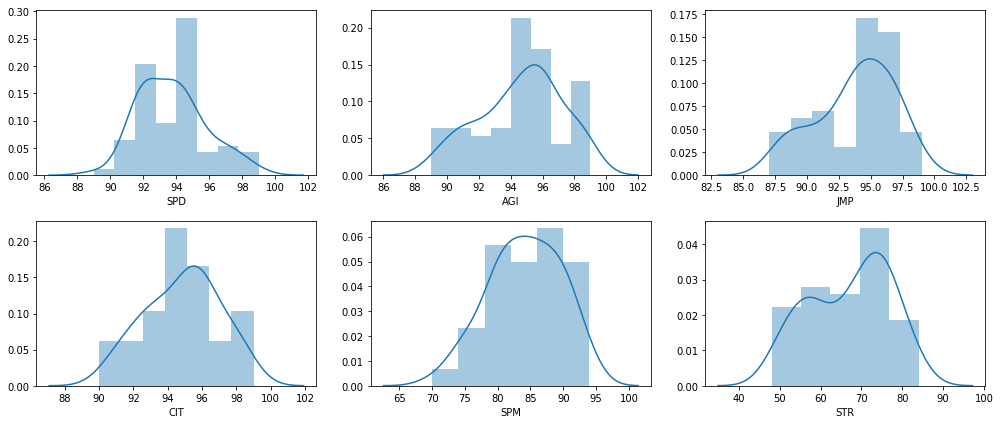

In [9]:
import seaborn as sns

plt.figure(figsize=(14,6))

attribs = ['SPD', 'AGI', 'JMP', 'CIT', 'SPM', 'STR']

for i in range(len(attribs)):
    plt.subplot(2, 3, i+1)
    sns.distplot(pdf[attribs[i]]);
plt.tight_layout();

In [23]:
heavy = pdf[ pdf['Wt'] >= 300]
lighter = pdf[ pdf['Wt'] < 300]

fast = pdf[ pdf['SPD'] >= 80]
medium = pdf[ (pdf['SPD'] >= 70) & (pdf['SPD'] < 80)]
slow = pdf[ pdf['SPD'] < 70]

Grouping players by position:

In [10]:
position_groups = pdf.groupby('Position')

df_dict = {}

for name, group in position_groups:
    df_dict.update({name: group})

Method for filtering dataframe by an attributes rating:

In [11]:
def attribute_restriction(dat, attrib, rating):
    df = dat.copy()
    df = df[ df[attrib] >= rating]
    return df

### Visualization with Plotly 

In [14]:
#pdf2 = attribute_restriction(pdf, 'AGI', 87)
#pdf2 = attribute_restriction(pdf2, 'SPD', 85)

#df = pdf

color_map = {'WR': 'rgb(230,0,230)'}

attrib_list = ['SPD', 'AGI', 'JMP', 'CIT', 'SPM', 'STR', 'Ht', 'RBK', 'SPC']


def get_trace(pos, df0):

    trace = go.Splom(dimensions=[dict(label=attrib, values=df0[attrib]) for attrib in attrib_list],
                text=df0.index.values,
                name=pos,
                marker=dict(size=5,
                            showscale=False,
                            line=dict(width=0.5,
                                      color=color_map.get(pos)))
                )
    return trace

In [15]:
# Trace
traces = []

for pos in ['WR']:
    traces.append( get_trace(pos, df_dict.get(pos)))

# Axis
axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=4)

layout = go.Layout(
    title='MUT19 WRs (95+ OVR)',
    dragmode='select',
    width=1000,
    height=800,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis), xaxis2=dict(axis), xaxis3=dict(axis), xaxis4=dict(axis),
    xaxis5=dict(axis), xaxis6=dict(axis), xaxis7=dict(axis), xaxis8=dict(axis),
    yaxis1=dict(axis), yaxis2=dict(axis), yaxis3=dict(axis), yaxis4=dict(axis),
    yaxis5=dict(axis), yaxis6=dict(axis), yaxis7=dict(axis), yaxis8=dict(axis)
)

for trace in traces:
    trace['diagonal'].update(visible=False)
    trace['showupperhalf']=False

fig = dict(data=traces, layout=layout)

py.iplot(fig)

### Correlation between Variables:
We can see a correlation of 1 between PRC and AWR and -0.8 between SPD and Wt.

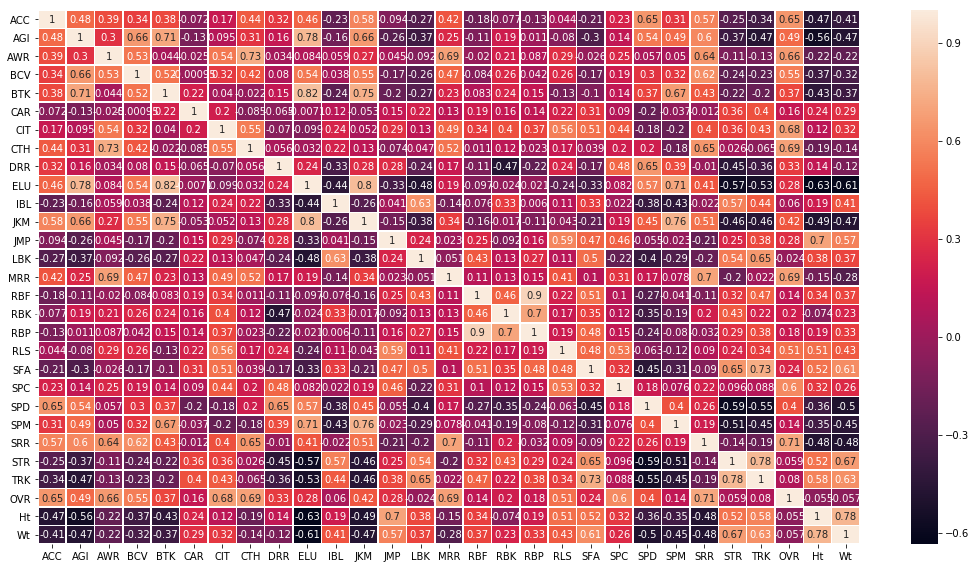

In [20]:
plt.subplots(figsize=(15,8))
sns.heatmap(pdf.corr(), linewidths=.5, annot=True);
plt.tight_layout();

In [ ]:
#pdf[ (pdf['Strips Ball'] == 'Yes') & (pdf['Big Hitter'] == 'Yes')]

In [21]:
print('Clutch:')
set(pdf[ pdf['Clutch'] == 'Yes'].index)

Clutch:


{'A.J. Green',
 'Andre Reed',
 'Antonio Brown',
 'Calvin Johnson',
 'Cris Carter',
 'DeAndre Hopkins',
 'Golden Tate III',
 'Julian Edelman',
 'Julio Jones',
 'Keenan Allen',
 'Larry Fitzgerald',
 'Michael Thomas',
 'Odell Beckham Jr',
 'Randy Moss',
 'Stefon Diggs',
 'Steve Smith Sr',
 'Tim Brown'}

In [22]:
pdf.corr()

,ACC,AGI,AWR,BCV,BTK,CAR,CIT,CTH,DRR,ELU,...,SFA,SPC,SPD,SPM,SRR,STR,TRK,OVR,Ht,Wt
ACC,1.000000,0.483522,0.392131,0.341792,0.378384,-0.071548,0.167302,0.435807,0.317791,0.464040,...,-0.207389,0.231402,0.647134,0.312407,0.572874,-0.253199,-0.341940,0.647128,-0.469697,-0.406813
AGI,0.483522,1.000000,0.296619,0.658762,0.710110,-0.125728,0.094738,0.309550,0.158212,0.777215,...,-0.297161,0.144013,0.535913,0.490313,0.596790,-0.369516,-0.465018,0.489302,-0.561874,-0.474671
AWR,0.392131,0.296619,1.000000,0.532134,0.044010,-0.025014,0.540398,0.733314,0.034429,0.083886,...,-0.026334,0.249812,0.057209,0.049527,0.644506,-0.112366,-0.132817,0.658279,-0.218541,-0.224345
BCV,0.341792,0.658762,0.532134,1.000000,0.516449,-0.000954,0.318638,0.420449,0.079522,0.536195,...,-0.165080,0.193988,0.303036,0.315931,0.621711,-0.237048,-0.233381,0.554619,-0.365756,-0.320880
BTK,0.378384,0.710110,0.044010,0.516449,1.000000,0.215225,0.039719,-0.021745,0.146255,0.815057,...,-0.103924,0.138573,0.365356,0.670685,0.430782,-0.220273,-0.196283,0.370656,-0.431033,-0.371822
CAR,-0.071548,-0.125728,-0.025014,-0.000954,0.215225,1.000000,0.204969,-0.085283,-0.065258,-0.007110,...,0.311016,0.090017,-0.196246,-0.037106,-0.011520,0.360339,0.402183,0.161992,0.238141,0.289284
CIT,0.167302,0.094738,0.540398,0.318638,0.039719,0.204969,1.000000,0.548587,-0.070071,-0.099010,...,0.514127,0.435779,-0.181228,-0.204805,0.400152,0.361379,0.434276,0.684417,0.121708,0.319138
CTH,0.435807,0.309550,0.733314,0.420449,-0.021745,-0.085283,0.548587,1.000000,0.056440,0.031963,...,0.039499,0.198593,0.200396,-0.180956,0.647507,0.026453,-0.064950,0.687558,-0.187515,-0.144964
DRR,0.317791,0.158212,0.034429,0.079522,0.146255,-0.065258,-0.070071,0.056440,1.000000,0.241376,...,-0.174746,0.475544,0.652804,0.391594,-0.010188,-0.446240,-0.357766,0.331875,0.140877,-0.119735
ELU,0.464040,0.777215,0.083886,0.536195,0.815057,-0.007110,-0.099010,0.031963,0.241376,1.000000,...,-0.332589,0.082043,0.568034,0.710536,0.413888,-0.571640,-0.531546,0.279762,-0.634087,-0.612418
